In [15]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results_june = []

results_june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
#results_june

In [5]:
# 2. Convert the June temperatures to a list.


temps_june = list(np.ravel(results_june))
#temps_june

In [6]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(results_june, columns = ['date', 'tobs'])
june_df.set_index(june_df['date'], inplace=True)
june_df.head()


,date,tobs
date,,
2010-06-01,2010-06-01,78.0
2010-06-02,2010-06-02,76.0
2010-06-03,2010-06-03,78.0
2010-06-04,2010-06-04,76.0
2010-06-05,2010-06-05,77.0


In [7]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [8]:
# 5. Return to your challenge instructions to compare your summary statistics
#OK

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_december = []
results_december = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
#results_december

In [10]:
# 7. Convert the December temperatures to a list.
temps_december = list(np.ravel(results_december))
#temps_december


In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_december = pd.DataFrame(results_december, columns = ['date', 'tobs'])
df_december.set_index(df_december['date'], inplace=True)
df_december.head()

,date,tobs
date,,
2010-12-01,2010-12-01,76.0
2010-12-03,2010-12-03,74.0
2010-12-04,2010-12-04,74.0
2010-12-06,2010-12-06,64.0
2010-12-07,2010-12-07,64.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_december.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
# 10. Return to your challenge instructions to compare your summary statistics
#OK

Extra queries

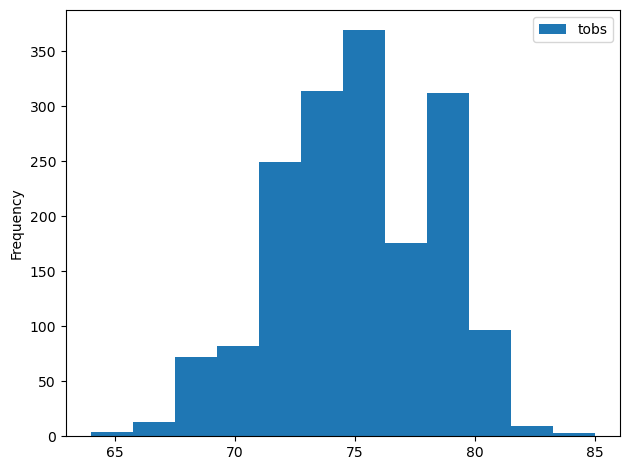

In [19]:
#June
june_df.plot.hist(bins=12)
plt.tight_layout()

In [ ]:
session.query()
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

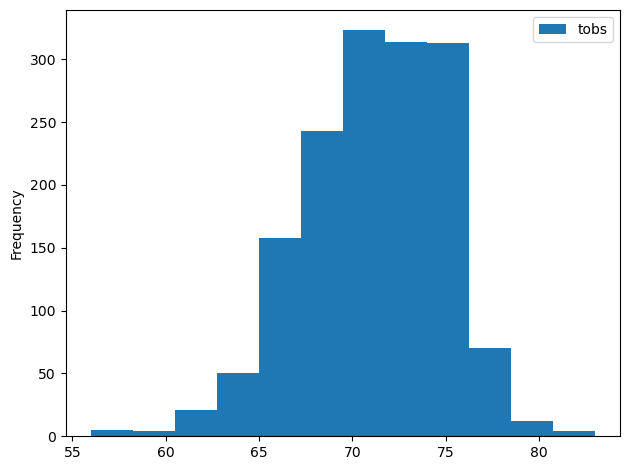

In [16]:
# Decemeber
df_december.plot.hist(bins=12)
plt.tight_layout()